In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

In [5]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
Base=automap_base()

Base.prepare(engine, reflect=True)

In [8]:
Base.classes.keys()

['measurement', 'station']

In [9]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
session = Session(engine)

In [11]:
session.query(Measurement.date).order_by(Measurement.date.desc()).first()
precipitation_analysis_1 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= "2016-08-23").\
    filter(Measurement.date <= "2017-08-23").all()
precipitation_analysis_1

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [12]:
pre_df = pd.DataFrame(precipitation_analysis_1)

In [13]:
pre_df['date'] = pd.to_datetime(pre_df['date'])

In [14]:
prec_df = pre_df.set_index('date')
prec_df.head()

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


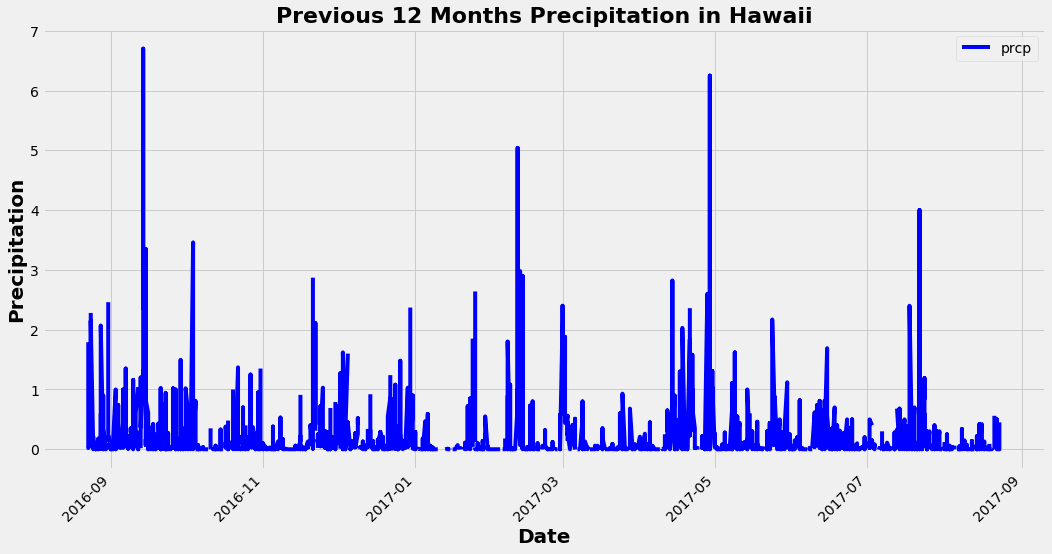

In [15]:
prec_plot = prec_df.plot(figsize = (16, 9), sort_columns=True, rot=45, use_index=True, legend=True, grid=True, color='b')
plt.ylabel('Precipitation', weight='bold', fontsize=20)
plt.xlabel('Date', weight='bold', fontsize=20)
plt.title("Previous 12 Months Precipitation in Hawaii",weight='bold', fontsize=22)
plt.show()

In [16]:
session.query(Station.id).count()

9

In [17]:
station_activity = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station) \
                            .order_by(func.count(Measurement.station).desc()).all()
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
most_active = station_activity[0][0]
stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)) \
                    .filter(Measurement.station == most_active).all()
print(f"{most_active}: min, avg, max = {stats}")

USC00519281: min, avg, max = [(54.0, 85.0, 71.66378066378067)]


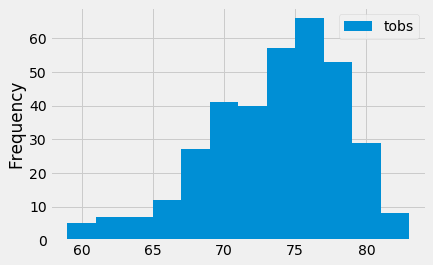

In [30]:
most_obs_station = session.query(Measurement.tobs).filter(Measurement.station ==most_active) \
                .filter(Measurement.date.between("2016-08-23", "2017-08-23")).all()

tobs_df = pd.DataFrame(most_obs_station, columns=['tobs'])
tobs_df.plot(kind='hist', bins=12)